# This is a continuation of the Capstone Project

The additional modeling includes a Convolutional Neural Network Model using Keras and Tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam



### Mount my Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Sources

## SWELL Dataset


In 2014, a study was conducted to measure the heart rate of a group under normal and stressful conditions. The data was collected by researchers at the Institute for Computing and Information Sciences at Radboud University (Koldijk, S., et.al.,2014). The dataset, referred to as SWELL, consists of heart rate signal recordings of 25 subjects doing typical office work, including writing reports, making presentations, reading e-mail and searching for information. The scientists recorded the signals during typical working stressors such as receiving unexpected emails interruptions and pressure to complete their work on time.  

A copy of the original paper can be found at this location:

https://www.cs.ru.nl/~skoldijk/Papers/ICMI%202014%20paper_final_cr.pdf


Load SWELL Dataset

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Capstone/SWELL/hrv dataset/data/final/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Capstone/SWELL/hrv dataset/data/final/test.csv")

In [ ]:
X_train = train.drop('condition', axis=1)
y_train = train['condition']
X_test =  test.drop('condition',axis=1)
y_test =  test['condition']

<BarContainer object of 3 artists>

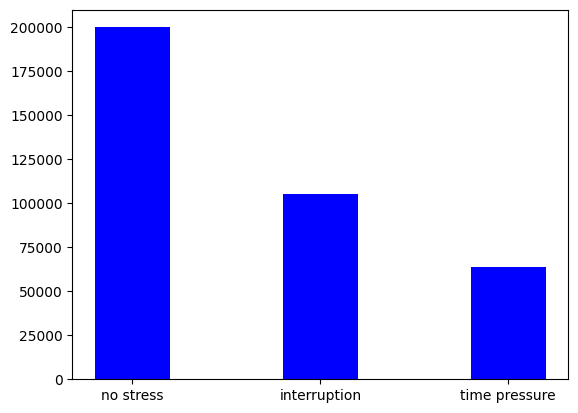

In [ ]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='blue',width = 0.4)

In [ ]:
train.columns


Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
e = test['condition'].unique()
test['condition'] = le.transform(test['condition'])

In [ ]:
test['condition'].value_counts()

condition
1    22158
0    11782
2     7093
Name: count, dtype: int64

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
e = test['condition'].unique()
test['condition'] = le.transform(test['condition'])

f = le.transform(e)
print(f)

[1 2 0]


In [ ]:
g = le.inverse_transform(f)
print(g)

# 0 = No stress
# 1 = Interruption
# 2 = Time Pressure

[1 2 0]


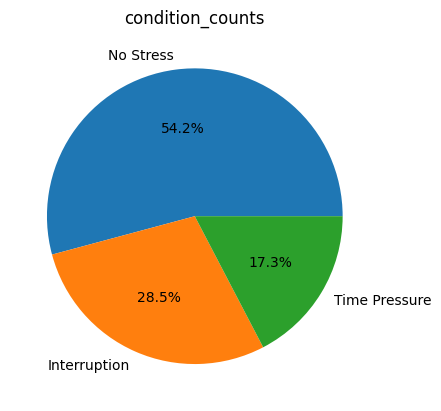

In [ ]:
condition_counts = train['condition'].value_counts()
labels = ["No Stress", "Interruption", "Time Pressure"]
sizes = condition_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('condition_counts')
plt.show()

### Initial Data Preprocessing.

The collected HRV data in the SWELL−KW dataset are time-variant. For classification, we re-construct the HRV data, which was a discrete time series with timestamps, to a series indexed with sequence numbers without timestamps.

Noisy, incomplete, or missing data is removed.

The result is 25 participant’s data with 410322 number of records and 34 number of features for stress level classification.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# code to replicate Step 1
X = train.drop(columns=['datasetId', 'condition'])
y = train.condition
onehot_encoder = OneHotEncoder(sparse_output=False)
y = onehot_encoder.fit_transform(y.to_numpy().reshape(-1, 1))

### Further data preprocessing steps are performed as follows.

Splitting data for training and testing as 80|20 for train|test datasets, respectively;
Normalization with a standard scalar method to confine the feature values within the range of {0,1}, as some of the selected features were in different magnitudes; and
Reshaping of each row of the training features into a 1D vector so that it becomes an input to the input layer of the deep learning model.

In [ ]:
# code to replicate Step 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = StandardScaler().fit_transform(X_train).reshape(-1, 1, 34)
X_test = StandardScaler().fit_transform(X_test).reshape(-1, 1, 34)
X_train.shape

(295431, 1, 34)

# A Convolutional Neural Network (CNN) is built


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Softmax

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'))
model.add(Dense(units=16, activation='relu'))
model.add(MaxPool1D(pool_size=1, strides=1))
model.add(Flatten())
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=2,  # number of epochs
                    batch_size=64,  # batch size
                    validation_split=0.05)

Epoch 1/2
4386/4386 [==============================] - 13s 3ms/step - loss: 0.2436 - accuracy: 0.9132 - val_loss: 0.0718 - val_accuracy: 0.9823
Epoch 2/2
4386/4386 [==============================] - 11s 3ms/step - loss: 0.0451 - accuracy: 0.9895 - val_loss: 0.0233 - val_accuracy: 0.9951


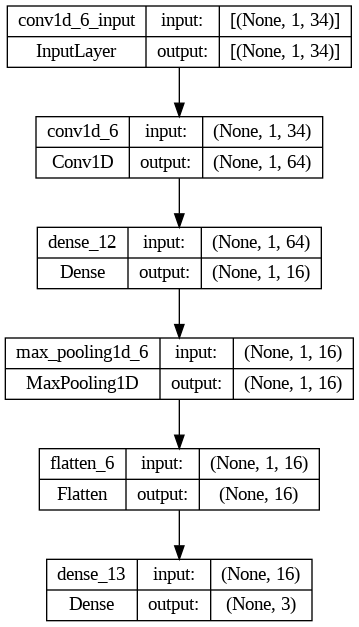

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming you have built your model as 'model'
plot_model(model, to_file='model.png', show_shapes=True)

# Testing

In [ ]:
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming a multi-class classification problem
y_test_classes = np.argmax(y_test, axis=1)

2309/2309 [==============================] - 4s 2ms/step


Precision: 0.9947769951355528
Recall: 0.9947737550434618
Accuracy: 0.9947737550434618
F1 Score: 0.9947735815803664
Matthews Correlation Coefficient: 0.9912073891062401
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20868
           1       1.00      1.00      1.00     40169
           2       0.99      1.00      0.99     12821

    accuracy                           0.99     73858
   macro avg       0.99      0.99      0.99     73858
weighted avg       0.99      0.99      0.99     73858



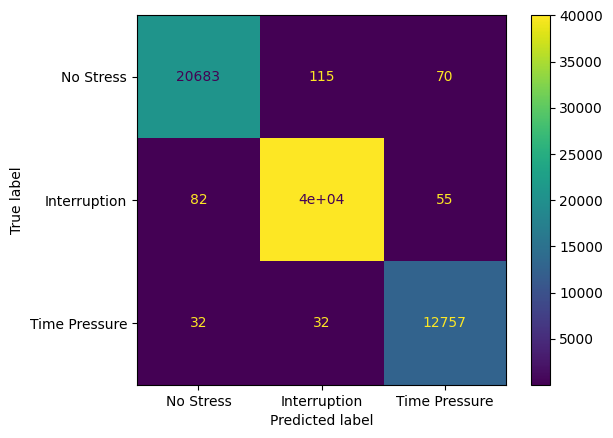

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix, ConfusionMatrixDisplay


precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
mcc = matthews_corrcoef(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)
cm = confusion_matrix(y_test_classes, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print("Classification Report:\n", report)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Stress', "Interruption", "Time Pressure"])
disp.plot()

In [ ]:
   model_results = [{
        'Model': "CNN",
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1 Score': f1,
   }
   ]

results_df = pd.DataFrame(model_results)# Create a styled DataFrame
styled_df = results_df.style.set_caption('CNN Model Performance Comparison').set_table_styles([
    {'selector': 'caption', 'props': [('text-align', 'center')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
])

# Display the styled DataFrame
styled_df

,Model,Precision,Recall,Accuracy,F1 Score
0,CNN,0.994777,0.994774,0.994774,0.994774


# End of Modeling